In [3]:
from selenium.webdriver import Chrome,ChromeOptions

In [5]:
from webdriver_manager.chrome import ChromeDriverManager

In [9]:
from selenium.webdriver.chrome.service import Service

In [21]:
from selenium.webdriver.common.by import By

In [115]:
from keyboard import is_pressed

In [114]:
# pip install keyboard

     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.1 kB 217.9 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/58.1 kB 217.9 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.1 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 306.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
cm = ChromeDriverManager()
driver = Chrome(service=Service(cm.install()))

In [129]:
default_url = "https://www.google.com/images?q=" + input()

In [130]:
driver.get(default_url)

In [19]:
driver.maximize_window()

In [131]:
atags = driver.find_elements(By.TAG_NAME,"img")

In [132]:
images = [tag.get_attribute("src") for tag in atags]

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png
https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png
https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png












https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzlHTILKxNKvdB-E9M7tSabqWAOoA7IoWQc_Avpk3Q4DLhW8Ei5iumPg0&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0goqYhPTeYj2itvqZgLF_NVi4rtt3D1auLCYfkX78MSB39dey1DC4TTk&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPQUJUDD0sxDCreQWooay9PhIZOo2KPnmfeYQTSn8rS6nmk3N3ozH2klE&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-gxD3Vlt3siJT3nm7gKjrMpHOiwIMQJLxvfCwVEThSVSqkaLxUonyt8M&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbc6C_G4Pw46fI-YvvaRxS2aiEHkHhgvda3I9skIXiC2ppqXaCK_TVJD4&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGYk76H6cTTYhGU3n5PjPUdRh4G6cMP-wgg61mqTyNwIdlVfgxEOSd-vI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2aMVE6HEz_x4Xp4UcqLhxAiHdC4-ahm
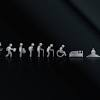
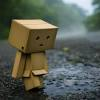
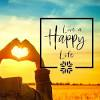
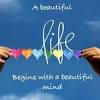
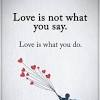
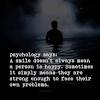
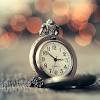
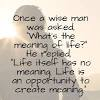
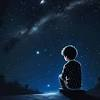
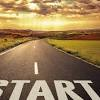
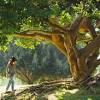
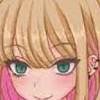
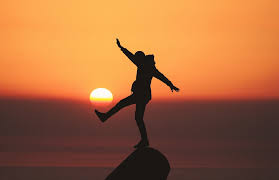
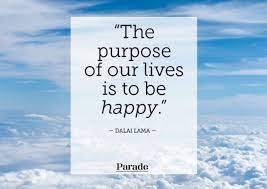
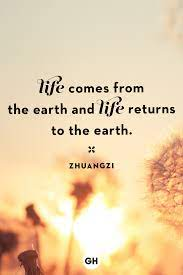
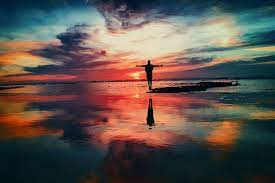
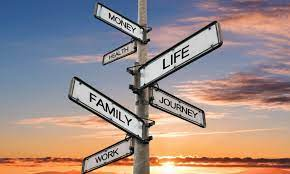
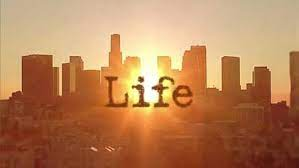
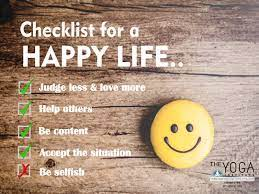
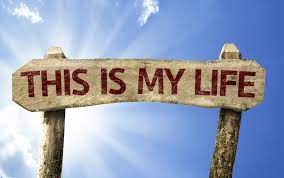
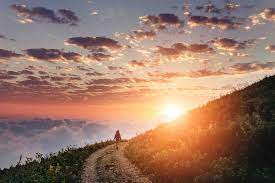
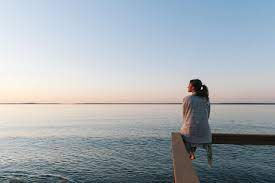
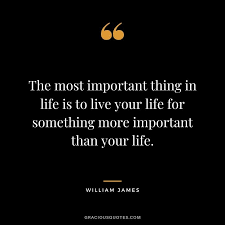
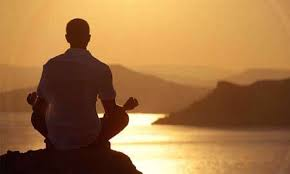
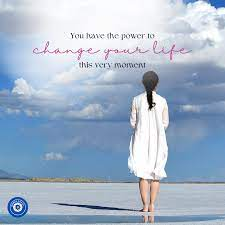
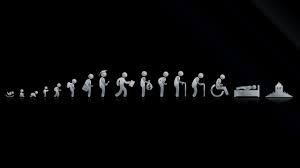
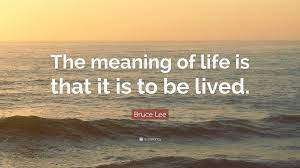
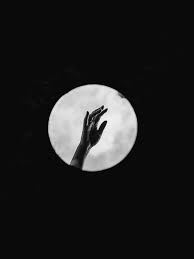
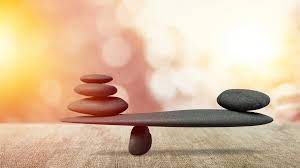
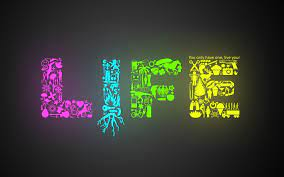
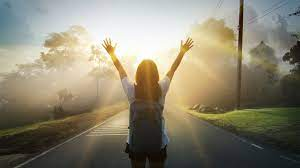
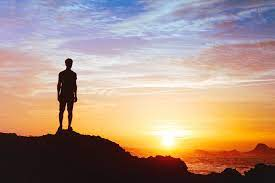

In [97]:
print(*images,sep="\n")

In [56]:
images[0].count("a")

2

In [133]:
images = [img for img in images if img is not None and img.find("https://encrypted-tbn0.gstatic.com/")!=-1 ]

In [134]:
images

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOcF6IjKjiWifgGS-pjobb_zizC0BnnNWlOHan0koyuyfrz14WPZufPvI&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9C3zAx32TPNZTivWa3s6FAz9BFyuicmg2AaOU6XpIu8NgCoKVlo5WHRk&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSHjylT3iltHFDq17a_GgcH0t82A6s1h1_xhPRmVzRVhPMeCZKBBsrpB4&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUr_rK1fsGLJ8kIs3PtRCPFC29eU1WlRqOeo9gNZKKvl2c0J6srDNjsFA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEyVu_8iW5jqPag5cCKXw7bZgcVP2wxEYa0rm0hvywTCB9XTqRJF-KTYw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0BQpqfeJvCiWjjUibZYoP6TJGYcmLq73_hqUAG_r3R2Rf72s6ahC6jlc&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFZTjcfSZjdLyL_vbPWi0LgdVqLp4cl-YBNVozP0SAwzevwiYfSgOSeXo&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSH2whaFYHpfzmaIMrewcwJ_it10K77S_qzAmH6aLWaKUdNgDsuG45njyc&usqp=CAU',


In [105]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [135]:
driver.find_element(By.CLASS_NAME,"LZ4I").is_displayed()

False

In [138]:
while not is_pressed("esc"):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    show_more = driver.find_element(By.CLASS_NAME,"LZ4I")
    if show_more.is_displayed():
        show_more.click()
